<h3>Random Forest Classifier - Respondent 1 </h3>

<h2>Pre-processing</h2>

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the CSV file
file_path = '001-b45731a0_emotions_with_cognitive_task_and_screen.csv'
data = pd.read_csv(file_path)

# Load the second CSV file
new_file_path = '003-91dc3428_emotions_with_cognitive_task_and_screen.csv'
new_data = pd.read_csv(new_file_path)

# Merge the two dataframes
data = pd.concat([data, new_data])

# Drop the Timestamp column
data = data.drop('Timestamp', axis=1)

# Remove columns with all NaN values
data = data.dropna(axis=1, how='all')

# Drop rows with NaN values in the target column
data = data.dropna(subset=['Cognitive Task'])
print(data.head())

# Identify numeric and categorical features, excluding the target variable
all_columns = data.columns.tolist()
target_column = 'Cognitive Task'
# Select specific columns for the random forest
selected_columns = ['Joy', 'Confusion', 'Disgust', 'Contempt', 'Sentimentality', 'Surprise', 'Sadness', 'Anger', 'Fear', 'Engagement']

numeric_features = data[selected_columns].select_dtypes(include=['int64', 'float64']).columns


# Exclude the target column from the numeric features
numeric_features = numeric_features.drop('Cognitive Task', errors='ignore')

# Define the preprocessing steps for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


# Combine the preprocessing steps into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Preprocess the data
y = data['Cognitive Task']

X = data[selected_columns]
X_preprocessed = preprocessor.fit_transform(X)

# Get the transformed feature names for the categorical columns
# cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Combine the numeric and transformed categorical feature names
# all_feature_names = list(numeric_features) + list(cat_feature_names)

# Convert the preprocessed data back to a DataFrame
X_preprocessed = pd.DataFrame(X_preprocessed, columns=selected_columns)

# Reset the index of y
y.reset_index(drop=True, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


         Anger  Contempt   Disgust      Fear       Joy   Sadness  Surprise  \
3705  0.117002  0.136948  0.021518  0.116770  0.041248  0.112264  0.059114   
3706  0.131634  0.137617  0.021531  0.132963  0.040812  0.112249  0.067522   
3707  0.164536  0.137096  0.021582  0.169795  0.040925  0.111568  0.087434   
3708  0.207359  0.136868  0.021714  0.218535  0.041063  0.111219  0.114075   
3709  0.240224  0.137239  0.021806  0.256706  0.040785  0.110944  0.135015   

      Engagement  Valence  Sentimentality  ...  Smirk  Upper Lip Raise  Blink  \
3705    0.328766      0.0        0.976782  ...    0.0         0.006627    0.0   
3706    0.328766      0.0        0.911952  ...    0.0         0.007317    0.0   
3707    0.328766      0.0        0.831274  ...    0.0         0.014862    0.0   
3708    0.328766      0.0        0.829263  ...    0.0         0.019549    0.0   
3709    0.328766      0.0        0.773583  ...    0.0         0.020340    0.0   

      BlinkRate     Pitch       Yaw      Rol

<h2>Random Forest Classifier</h2>

Confusion Matrix:
 [[6883   67  174   24   22  161  157]
 [ 243 2465  141   13   23   94   78]
 [ 159   46 4981    6   14   38   66]
 [ 127   26   92 1626   29  106   45]
 [ 166   30   75   17 1647  121   61]
 [ 383   41   77   27   47 3929   78]
 [ 307   61  171   23   24  111 4450]]

Classification Report:
                      precision    recall  f1-score   support

     Assess Results       0.83      0.92      0.87      7488
           Conclude       0.90      0.81      0.85      3057
            Explore       0.87      0.94      0.90      5310
              Focus       0.94      0.79      0.86      2051
Generate Hypothesis       0.91      0.78      0.84      2117
           Set Goal       0.86      0.86      0.86      4582
    Test Hypothesis       0.90      0.86      0.88      5147

           accuracy                           0.87     29752
          macro avg       0.89      0.85      0.87     29752
       weighted avg       0.88      0.87      0.87     29752


Accuracy Score

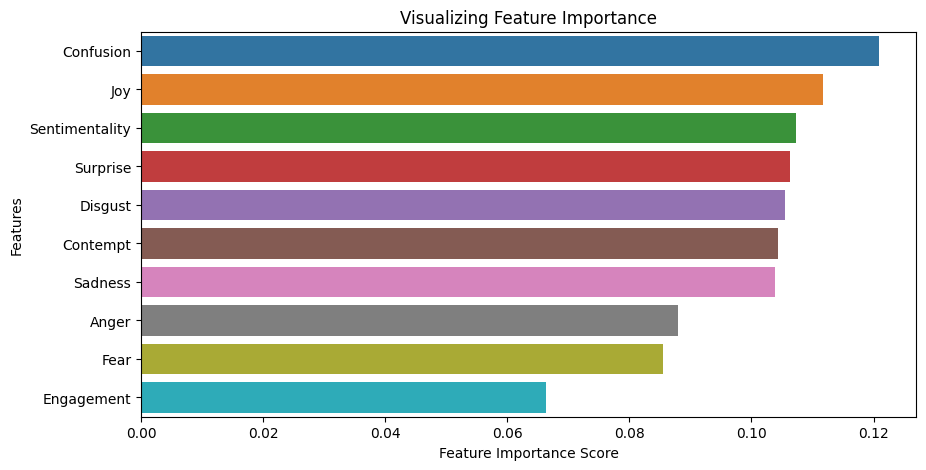

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

    
# Define the class weights based on the class distribution
class_weights = {
    'Assess Results': 0.5,  # Assess Results - weight for class 0 (majority class)
    'Conclude': 1.5,  # Conclude - weight for class 1 (minority class)
    'Explore': 1.0,  # Explore - weight for class 2 (majority class)
    'Focus': 2.0,  # Focus - weight for class 3 (minority class)
    'Generate Hypothesis': 2.0,  # Generate Hypothesis - weight for class 4 (minority class)
    'Set Goal': 1.0,  # Set Goal - weight for class 5 (majority class)
    'Test Hypothesis': 1.0  # Test Hypothesis - weight for class 6 (majority class)    
}

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Plot the feature importance
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=selected_columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Feature Importance')
plt.show()


In [10]:
from sklearn.model_selection import cross_val_score

# Use 5-fold cross-validation to evaluate the model
cv_scores = cross_val_score(model, X_preprocessed, y, cv=5)
print("Average cross-validation score:", np.mean(cv_scores))


Average cross-validation score: 0.2220434841324248


<h3>Random Forest with Hyperparameters and Cross Validation</h3> 

Best parameters: {'max_depth': None, 'max_features': 'sqrt'}
Cross-validation score: 0.22248042209151048
Confusion Matrix:
 [[7318   19    1  113    7   22    8]
 [2946   37    0   47    3   20    4]
 [5175    5    1  102    8   11    8]
 [1901   40    0   88    0   16    6]
 [1947   14    0  129    3   19    5]
 [4233   45    0  197   10   85   12]
 [4966   23    0  104    7   27   20]]

Classification Report:
                      precision    recall  f1-score   support

     Assess Results       0.26      0.98      0.41      7488
           Conclude       0.20      0.01      0.02      3057
            Explore       0.50      0.00      0.00      5310
              Focus       0.11      0.04      0.06      2051
Generate Hypothesis       0.08      0.00      0.00      2117
           Set Goal       0.42      0.02      0.04      4582
    Test Hypothesis       0.32      0.00      0.01      5147

           accuracy                           0.25     29752
          macro avg       0.27   

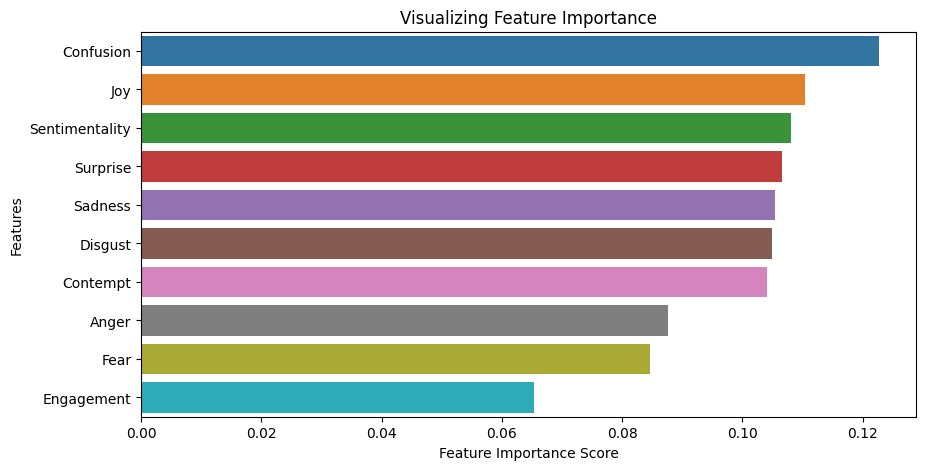

In [12]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the class weights based on the class distribution
class_weights = {
    'Assess Results': 0.5,  # Assess Results - weight for class 0 (majority class)
    'Conclude': 1.5,  # Conclude - weight for class 1 (minority class)
    'Explore': 1.0,  # Explore - weight for class 2 (majority class)
    'Focus': 2.0,  # Focus - weight for class 3 (minority class)
    'Generate Hypothesis': 2.0,  # Generate Hypothesis - weight for class 4 (minority class)
    'Set Goal': 1.0,  # Set Goal - weight for class 5 (majority class)
    'Test Hypothesis': 1.0  # Test Hypothesis - weight for class 6 (majority class)    
}

# Create the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)

# Use cross-validation to evaluate and improve the model
param_grid = {'max_depth': [5, 10, None],
              'max_features': ['sqrt', 'log2', None]}
grid = GridSearchCV(model, param_grid=param_grid, cv=5)
grid.fit(X, y)

# Print the best parameters and cross-validation score
print("Best parameters:", grid.best_params_)
print("Cross-validation score:", grid.best_score_)

# Train the final model with the best hyperparameters on the entire dataset
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights,
                               max_depth=grid.best_params_['max_depth'],
                               max_features=grid.best_params_['max_features'])
model.fit(X, y)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Plot the feature importance
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=selected_columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Feature Importance')
plt.show()
